<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/SVC_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/WineQT.csv')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [ ]:
# Define a function to label quality
def quality_label(q):
    if q <= 5:
        return "low"
    elif q == 6:
        return "medium"
    else:
        return "high"

# Apply the function to create a new column
df["quality_label"] = df["quality"].apply(quality_label)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,low


In [ ]:
x = df.drop(columns=["quality_label", "Id"]) # Exclude target and ID
y = df["quality_label"]


In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

<Axes: >

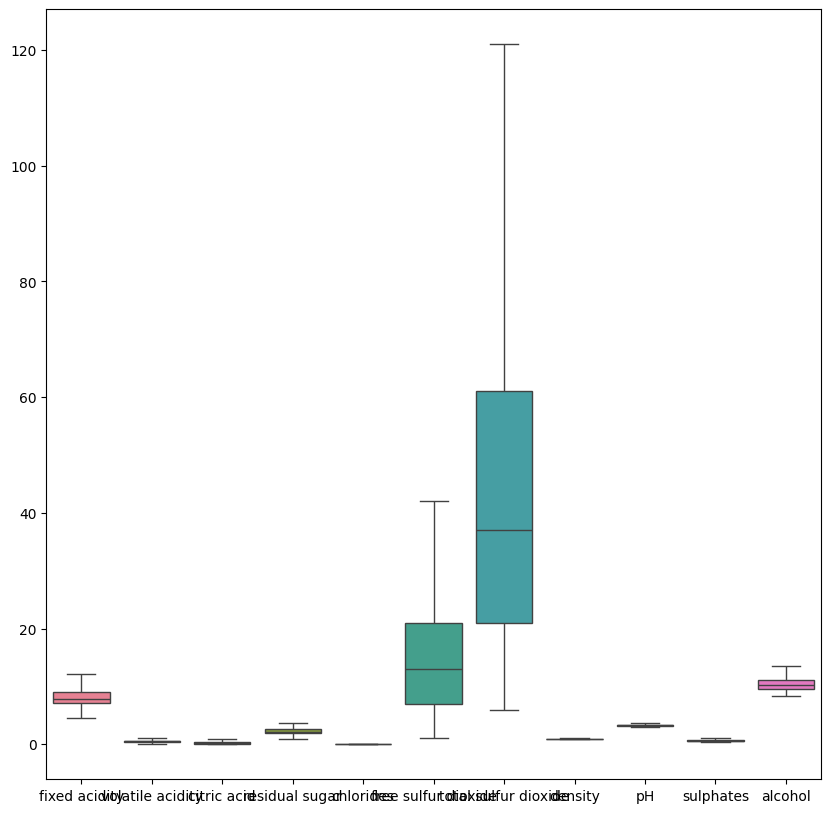

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=x, ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

<Axes: >

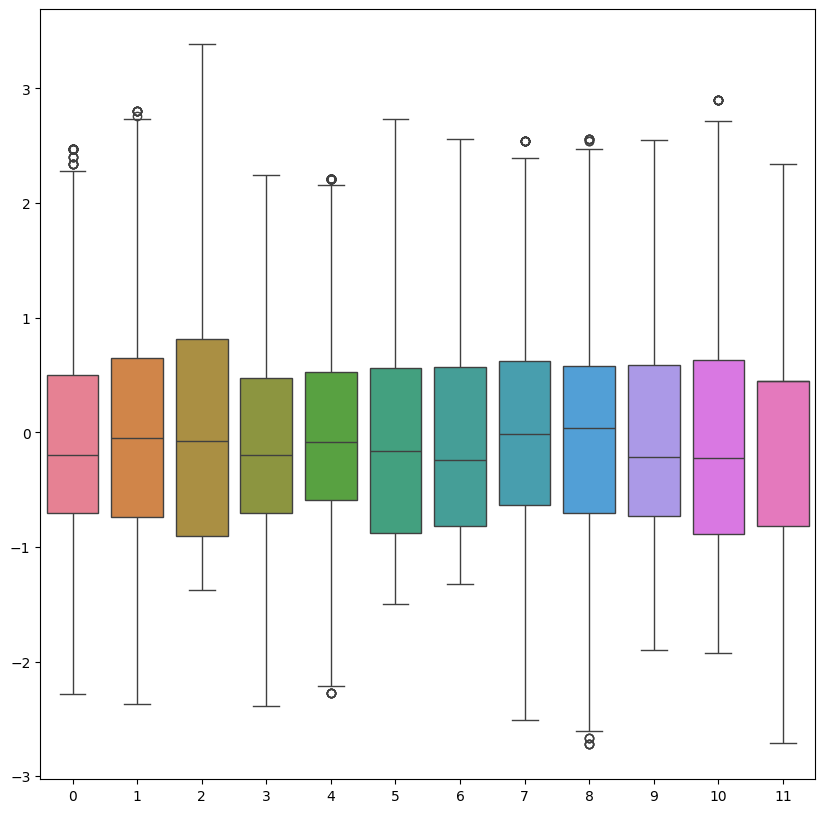

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=x_train_norm, ax=ax)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train_norm,y_train)


SVC()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_norm, y_train)

In [ ]:
y_resampled.value_counts()

,count
quality_label,
low,370
medium,370
high,370


In [ ]:
svc.fit(x_resampled, y_resampled)

SVC()

In [ ]:
y_pred=svc.predict(x_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.9970845481049563

In [ ]:
svc.score(x_test_norm,y_test)

0.9970845481049563

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import uniform # Import uniform from scipy.stats

param_dist = {
    'C': uniform(0.1, 10),          # C from 0.1 to 10
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],            # Only relevant for 'poly' kernel
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=50,               # Try 50 random combinations
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(x_resampled, y_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e17fd8cc510>,
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [ ]:
random_search.best_params_

{'C': np.float64(9.799098521619943), 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svc_ne=SVC(C= np.float64(9.79909852161), degree=3, gamma=1, kernel='rbf')

In [ ]:
svc_ne.fit(x_resampled, y_resampled)

SVC(C=np.float64(9.79909852161), gamma=1)

In [ ]:
'''y_pred1=svc_ne.predict(x_test_norm)

In [ ]:
'''svc_ne.score(x_test_norm,y_test)

0.8425655976676385

In [ ]:
'''accuracy_score(y_test,y_pred1)

0.8425655976676385